### Goldsmiths University of London
### Author....: Carlos Manuel de Oliveira Alves
### Student...: cdeol003
### Created...: 12/02/2023
### FYP.......: NeuroCredit

In [17]:
# Multiple Linear Regression

# Import the libraries to implement the linear regression model
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [32]:
# Import the dataset to implement the linear regression model
dataset = pd.read_csv('data.csv')

# Select all the columns except the last one as the independent variables vector
X = dataset.iloc[:, :-1].values

# Select the last column as the dependent variable vector
y = dataset.iloc[:, -1].values

In [33]:
# Print first 5 rows with the independent variables vector
print(X[:5])

[['Poor' 'Self-Employed' 'None' 'Fair' 'Auto' 'Judgement'
  'Debt Consolidation' 30971 11969 78 21 0 5 0 135 18627 25 4648 4719]
 ['Poor' 'Unemployed' 'Investment' 'Excellent' 'Mortgage' 'Collection'
  'Home Improvement' 19120 45396 81 92 0 2 1 19857 11996 58 2657 19366]
 ['Excellent' 'Unemployed' 'House' 'Poor' 'Other' 'Bankruptcy'
  'Debt Consolidation' 48687 18880 73 27 0 3 1 17501 18074 30 2487 15500]
 ['Fair' 'Unemployed' 'Car' 'Good' 'Other' 'Tax Lien' 'Home Improvement'
  40997 11527 6 19 3 3 4 9376 5073 60 3100 12380]
 ['Good' 'Unemployed' 'House' 'Excellent' 'Personal' 'None' 'Business'
  35485 27016 33 49 5 2 3 18960 14542 99 1596 7946]]


In [34]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [35]:
# Encode the categorical data

# Import the library for encoding the categorical data
from sklearn.compose import ColumnTransformer

# Import the library for one hot encoding the categorical data
from sklearn.preprocessing import OneHotEncoder

# Create an object of the ColumnTransformer class
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0,1,2,3,4,5,6])], remainder='passthrough')

# Encoding the independent variables vector
X = np.array(ct.fit_transform(X))

In [36]:
# Print first 5 rows with the independent variables vector after encoding
print(X[:5])

[[0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0
  0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 30971 11969
  78 21 0 5 0 135 18627 25 4648 4719]
 [0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 19120 45396
  81 92 0 2 1 19857 11996 58 2657 19366]
 [1.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0
  0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 48687 18880
  73 27 0 3 1 17501 18074 30 2487 15500]
 [0.0 1.0 0.0 0.0 0.0 0.0 1.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0
  0.0 1.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 40997 11527
  6 19 3 3 4 9376 5073 60 3100 12380]
 [0.0 0.0 1.0 0.0 0.0 0.0 1.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0
  0.0 0.0 1.0 0.0 0.0 0.0 0.0 1.0 0.0 0.0 1.0 0.0 0.0 0.0 0.0 35485 27016
  33 49 5 2 3 18960 14542 99 1596 7946]]


In [39]:
# Print first 5 rows with the dependent variable vector
print(y[:5])

['Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected' 'Rejected'
 'Rejected' 'Rejected' 'Rejected' 'Rejected']


In [40]:
# Encode the categorical data for the dependent variable vector

# Import the library for encoding the categorical data
from sklearn.preprocessing import LabelEncoder

# Create an object of the LabelEncoder class
labelencoder_y = LabelEncoder()

# Encode the dependent variable vector
y = labelencoder_y.fit_transform(dataset.iloc[:, -1].values)

In [41]:
# Print first 5 rows with the dependent variable vector after encoding
print(y[:5])

[1 1 1 1 1]


In [42]:
# Split the dataset into training and test sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [43]:
# Training the Multiple Linear Regression model on the Training set
from sklearn.linear_model import LinearRegression

# Create an instance of the LinearRegression class
regressor = LinearRegression()

# Fit the training set
regressor.fit(X_train, y_train)

LinearRegression()

In [44]:
# Predict the test set results
y_pred = regressor.predict(X_test)

# Set the precision of the values to 2 decimal places
np.set_printoptions(precision=2)

# Print the predicted values and the actual values
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[1.09 1.  ]
 [0.88 1.  ]
 [0.94 1.  ]
 [1.01 1.  ]
 [0.96 1.  ]
 [1.04 1.  ]
 [0.99 1.  ]
 [1.07 1.  ]
 [1.07 1.  ]
 [0.97 1.  ]
 [0.91 1.  ]
 [0.77 1.  ]
 [1.1  1.  ]
 [0.97 1.  ]
 [1.04 1.  ]
 [1.01 1.  ]
 [0.73 1.  ]
 [0.61 0.  ]
 [0.68 0.  ]
 [0.94 1.  ]
 [1.02 1.  ]
 [0.91 1.  ]
 [0.98 1.  ]
 [0.92 1.  ]
 [0.76 1.  ]
 [1.08 1.  ]
 [0.64 1.  ]
 [0.64 0.  ]
 [1.15 1.  ]
 [0.91 1.  ]
 [0.61 0.  ]
 [1.05 1.  ]
 [1.13 1.  ]
 [0.74 0.  ]
 [0.63 1.  ]
 [0.98 1.  ]
 [1.04 1.  ]
 [0.53 1.  ]
 [0.6  1.  ]
 [0.91 1.  ]
 [1.11 1.  ]
 [0.89 1.  ]
 [0.56 0.  ]
 [1.03 1.  ]
 [1.12 1.  ]
 [0.98 1.  ]
 [1.06 1.  ]
 [0.97 1.  ]
 [1.19 1.  ]
 [0.71 1.  ]
 [1.06 1.  ]
 [0.93 1.  ]
 [0.86 1.  ]
 [0.86 1.  ]
 [0.88 1.  ]
 [1.01 1.  ]
 [1.13 1.  ]
 [0.95 1.  ]
 [0.92 1.  ]
 [1.   1.  ]
 [1.16 1.  ]
 [0.61 0.  ]
 [1.08 1.  ]
 [0.99 1.  ]
 [1.08 1.  ]
 [1.06 1.  ]
 [0.61 1.  ]
 [1.13 1.  ]
 [0.62 1.  ]
 [1.19 1.  ]
 [0.54 0.  ]
 [0.6  0.  ]
 [0.95 1.  ]
 [0.54 0.  ]
 [0.62 0.  ]
 [1.15 1.  ]
 [0.72 1.  ]

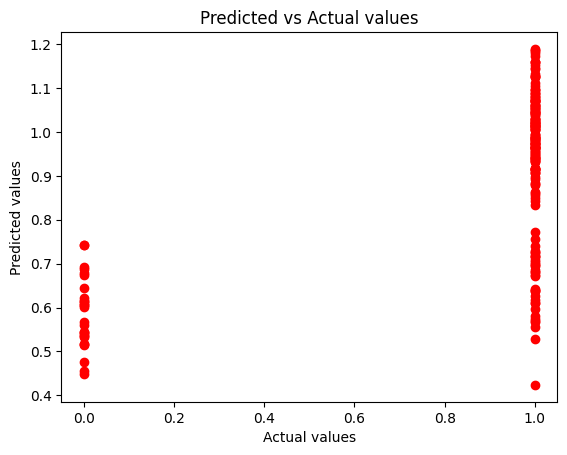

In [45]:
# Plot the predicted values and the actual values
plt.scatter(y_test, y_pred, color = 'red')
plt.title('Predicted vs Actual values')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')
plt.show()
